In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df2016 = pd.read_csv('features_2016.csv')
df2017 = pd.read_csv('features_2017.csv')

In [135]:
def filter_alt(alt):
    if int(alt) > 60000:
        alt = 60000
        return alt
    else:
        return alt
    
def filter_time(time):
    if time >= 80000 or time <= 1800:
        return None
    else:
        return time
    
def filter_distance(distance):
    if distance < 100:
        return None
    else: 
        return distance
    
pd.set_option('mode.chained_assignment', None)
df2016_cargo = df2016[df2016['type']==1]
df2016_passe = df2016[df2016['type']==0]
df2017_cargo = df2017[df2017['type']==1]
df2017_passe = df2017[df2017['type']==0]

df2016_cargo['max_alt'] = df2016_cargo.apply(lambda row: filter_alt(row['max_alt']), axis=1)
df2016_passe['max_alt'] = df2016_passe.apply(lambda row: filter_alt(row['max_alt']), axis=1)
df2017_cargo['max_alt'] = df2017_cargo.apply(lambda row: filter_alt(row['max_alt']), axis=1)
df2017_passe['max_alt'] = df2017_passe.apply(lambda row: filter_alt(row['max_alt']), axis=1)

df2016_cargo['time'] = df2016_cargo.apply(lambda row: filter_time(row['time']), axis=1)
df2016_passe['time'] = df2016_passe.apply(lambda row: filter_time(row['time']), axis=1)
df2017_cargo['time'] = df2017_cargo.apply(lambda row: filter_time(row['time']), axis=1)
df2017_passe['time'] = df2017_passe.apply(lambda row: filter_time(row['time']), axis=1)

df2016_cargo['distance'] = df2016_cargo.apply(lambda row: filter_distance(row['distance']), axis=1)
df2016_passe['distance'] = df2016_passe.apply(lambda row: filter_distance(row['distance']), axis=1)
df2017_cargo['distance'] = df2017_cargo.apply(lambda row: filter_distance(row['distance']), axis=1)
df2017_passe['distance'] = df2017_passe.apply(lambda row: filter_distance(row['distance']), axis=1)

cargo_2016_alt = df2016_cargo['max_alt'].to_numpy()
passe_2016_alt = df2016_passe['max_alt'].to_numpy()
cargo_2017_alt = df2017_cargo['max_alt'].to_numpy()
passe_2017_alt = df2017_passe['max_alt'].to_numpy()

df2016_cargo = df2016_cargo.dropna()
df2016_passe = df2016_passe.dropna()
df2017_cargo = df2017_cargo.dropna()
df2017_passe = df2017_passe.dropna()

cargo_2016_time = df2016_cargo['time'].to_numpy()
passe_2016_time = df2016_passe['time'].to_numpy()
cargo_2017_time = df2017_cargo['time'].to_numpy()
passe_2017_time = df2017_passe['time'].to_numpy()

cargo_2016_icao = df2016_cargo['Icao24'].to_numpy()
passe_2016_icao = df2016_passe['Icao24'].to_numpy()
cargo_2017_icao = df2017_cargo['Icao24'].to_numpy()
passe_2017_icao = df2017_passe['Icao24'].to_numpy()

# df2016_cargo
# df2016_passe
# df2017_cargo
# df2017_passe

# df2016_cargo.describe()
# print(df2017_cargo)
df2016_passe.groupby(['type']).mean()

,cls,start,end,start_lon,end_lon,start_lat,end_lat,max_alt,distance,time,avg_speed,startarea,endarea,start_sunrise,start_sunset,end_sunrise,end_sunset
type,,,,,,,,,,,,,,,,,
0.0,46.295968,1.474449e+09,1.474464e+09,4.146634,5.129603,47.209568,48.704525,34919.586694,945.83326,15028.004934,0.097919,0.382661,0.23629,0.365323,-0.143558,0.295459,-0.21297


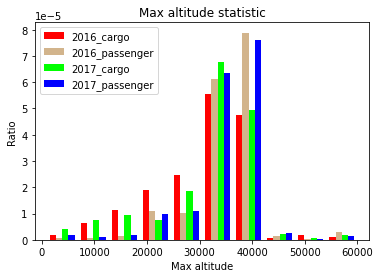

In [26]:
alt_list = []
alt_list.append(cargo_2016_alt)
alt_list.append(passe_2016_alt)
alt_list.append(cargo_2017_alt)
alt_list.append(passe_2017_alt)

colors = ['red', 'tan', 'lime', 'blue']
labels = ['2016_cargo', '2016_passenger', '2017_cargo', '2017_passenger']
plt.hist(alt_list, density=True, bins=10, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.xlabel("Max altitude")
plt.ylabel("Ratio")
plt.title("Max Altitude Histogram")
plt.show()

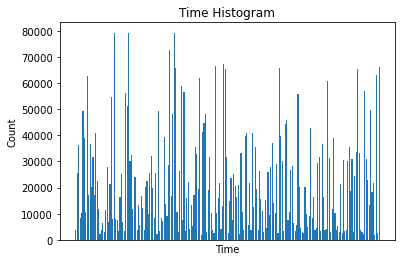

In [144]:
# time_list = []
# time_list.append(cargo_2016_time)
# time_list.append(passe_2016_time)
# time_list.append(cargo_2017_time)
# time_list.append(passe_2017_time)

# colors = ['red', 'tan', 'lime', 'blue']
# labels = ['2016_cargo', '2016_passenger', '2017_cargo', '2017_passenger']
# plt.hist(time_list, bins=10, histtype='bar', color=colors, label=labels)
plt.bar(cargo_2017_icao, cargo_2017_time)
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Time Histogram")
plt.savefig('time_4', bbox_inches='tight')
plt.show()